# CNN

In this notebook, we will go through basics of CNN using MNIST dataset.

Here we will use [fastai](https://github.com/fastai/fastai/  "fastai's Tutorial").

Everything is explained in-detail in [blog post](dudeperf3ct.github.io). This is notebook which replicates the result of blog and runs in colab. Enjoy!


#### Run in Colab

You can run this notebook in google colab.

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/dudeperf3ct/DL_notebooks/blob/master/CNN/mnist_cnn_fastai.ipynb)

### Install Dependecies

In [1]:
!pip install --upgrade torch torchvision fastai numpy

Requirement already up-to-date: torch in /usr/local/lib/python3.6/dist-packages (1.0.0)
Requirement already up-to-date: torchvision in /usr/local/lib/python3.6/dist-packages (0.2.1)
Requirement already up-to-date: fastai in /usr/local/lib/python3.6/dist-packages (1.0.36)
Requirement already up-to-date: numpy in /usr/local/lib/python3.6/dist-packages (1.15.4)


# Fastai

In [2]:
# load all the required libraries
from fastai import *
from fastai.vision import *
import torch

import matplotlib.pyplot as plt             # matplotlib library for plotting

# display plots inline (in notebook itself)
%matplotlib inline                         
defaults.cmap='gray'

device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
print (device)

cuda:0


## MNIST Dataset


 
The [MNIST dataset](http://yann.lecun.com/exdb/mnist/) of handwritten digits has a training set of 60,000 examples, and a test set of 10,000 examples each of size 28 x 28 pixels. The digits have been size-normalized and centered in a fixed-size image.

It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. 

Here is one example from dataset




In [3]:
# batch size

bs = 64

# transform the data

tfms = get_transforms(do_flip=False)

# load mnist data

path = untar_data(URLs.MNIST)
path

PosixPath('/root/.fastai/data/mnist_png')

In [4]:
(path/'training').ls(), (path/'testing').ls()

([PosixPath('/root/.fastai/data/mnist_png/training/4'),
  PosixPath('/root/.fastai/data/mnist_png/training/9'),
  PosixPath('/root/.fastai/data/mnist_png/training/7'),
  PosixPath('/root/.fastai/data/mnist_png/training/2'),
  PosixPath('/root/.fastai/data/mnist_png/training/8'),
  PosixPath('/root/.fastai/data/mnist_png/training/3'),
  PosixPath('/root/.fastai/data/mnist_png/training/6'),
  PosixPath('/root/.fastai/data/mnist_png/training/5'),
  PosixPath('/root/.fastai/data/mnist_png/training/1'),
  PosixPath('/root/.fastai/data/mnist_png/training/0')],
 [PosixPath('/root/.fastai/data/mnist_png/testing/4'),
  PosixPath('/root/.fastai/data/mnist_png/testing/9'),
  PosixPath('/root/.fastai/data/mnist_png/testing/7'),
  PosixPath('/root/.fastai/data/mnist_png/testing/2'),
  PosixPath('/root/.fastai/data/mnist_png/testing/8'),
  PosixPath('/root/.fastai/data/mnist_png/testing/3'),
  PosixPath('/root/.fastai/data/mnist_png/testing/6'),
  PosixPath('/root/.fastai/data/mnist_png/testing/5'),

In [0]:
# create databunch

data = (ImageItemList.from_folder(path)                     #Where to find the data? -> in path and its subfolders and grayscale
        .split_by_folder(train='training', valid='testing') #How to split in train/valid? -> use the folders
        .label_from_folder()                                #How to label? -> depending on the folder of the filenames
        .transform(tfms)                                    #Data augmentation? -> use tfms with a size of 28
        .databunch()                                        #Finally? -> use the defaults for conversion to ImageDataBunch
        .normalize(imagenet_stats))                   

In [6]:
data.train_ds, data.valid_ds, data.test_ds

(LabelList
 y: CategoryList (60000 items)
 [Category 4, Category 4, Category 4, Category 4, Category 4]...
 Path: /root/.fastai/data/mnist_png
 x: ImageItemList (60000 items)
 [Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
 Path: /root/.fastai/data/mnist_png, LabelList
 y: CategoryList (10000 items)
 [Category 4, Category 4, Category 4, Category 4, Category 4]...
 Path: /root/.fastai/data/mnist_png
 x: ImageItemList (10000 items)
 [Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28), Image (3, 28, 28)]...
 Path: /root/.fastai/data/mnist_png, None)

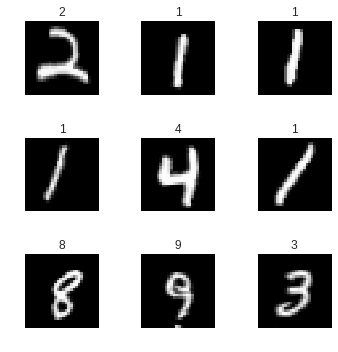

In [7]:
data.show_batch(rows=3, figsize=(5,5))

In [8]:
print(data.classes)
len(data.classes),data.c

['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']


(10, 10)

# Model

In [0]:
learn = create_cnn(data, models.resnet18, metrics=[error_rate, accuracy])

In [10]:
learn.fit_one_cycle(10)

epoch,train_loss,valid_loss,error_rate,accuracy
1,0.928463,0.751299,0.244100,0.755900
2,0.485235,0.360937,0.117400,0.882600
3,0.289315,0.168811,0.054300,0.945700
4,0.208025,0.100855,0.032200,0.967800
5,0.170779,0.084355,0.027200,0.972800
6,0.140391,0.067589,0.022200,0.977800
7,0.121508,0.061668,0.019900,0.980100
8,0.119994,0.055082,0.017800,0.982200
9,0.108113,0.054132,0.016800,0.983200
10,0.111148,0.055721,0.017900,0.982100


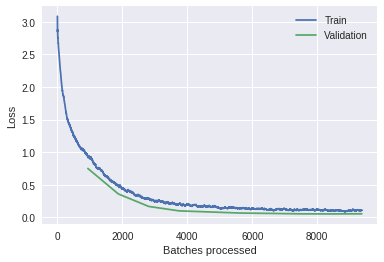

In [11]:
learn.recorder.plot_losses()

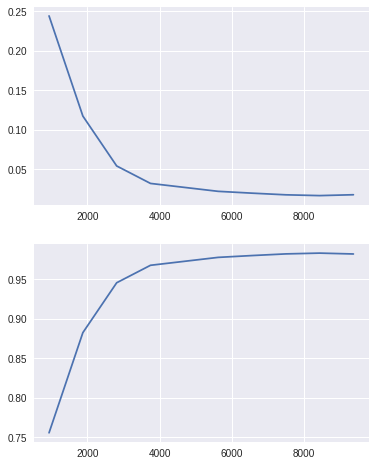

In [12]:
learn.recorder.plot_metrics()

# Results




Let's see what results we have got.

We will first see which were the categories that the model most confused with one another. We will try to see if what the model predicted was reasonable or not. In this case the mistakes look reasonable (none of the mistakes seems obviously naive). This is an indicator that our classifier is working correctly.

Furthermore, when we plot the confusion matrix, we can see that the distribution is heavily skewed: the model makes the same mistakes over and over again but it rarely confuses other categories. This suggests that it just finds it difficult to distinguish some specific categories between each other; this is normal behaviour.


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

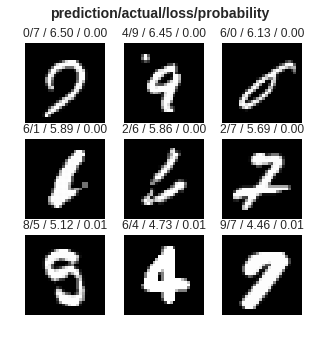

In [14]:
# The title of each image shows: prediction, actual, loss, probability of actual class.
interp.plot_top_losses(9, figsize=(5,5))

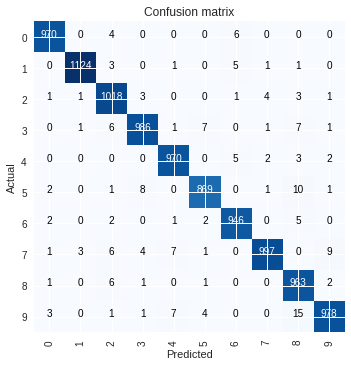

In [15]:
interp.plot_confusion_matrix(figsize=(5,5))

In [16]:
interp.most_confused(min_val=2)

[('9', '8', 15),
 ('5', '8', 10),
 ('7', '9', 9),
 ('5', '3', 8),
 ('3', '5', 7),
 ('3', '8', 7),
 ('7', '4', 7),
 ('9', '4', 7),
 ('0', '6', 6),
 ('3', '2', 6),
 ('7', '2', 6),
 ('8', '2', 6),
 ('1', '6', 5),
 ('4', '6', 5),
 ('6', '8', 5),
 ('0', '2', 4),
 ('2', '7', 4),
 ('7', '3', 4),
 ('9', '5', 4),
 ('1', '2', 3),
 ('2', '3', 3),
 ('2', '8', 3),
 ('4', '8', 3),
 ('7', '1', 3),
 ('9', '0', 3)]